# Github History of the Scala Language

**Goal**: The goal of this project is to apply data manipulation in Pandas and visualization with Matplotlib skills.

**Skills**: Python, Pandas, Matplotlib

**Problem**: Analyze and find insights from the project repository of Scala.

## Import Modules

In [1]:
# Install requirement before importing modules (uncomment the line below)
# !pip install -r requirements.txt

# Import numpy
import numpy as np

# Import pandas
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt

# Set the plot style to fivethirtyeight
plt.style.use("fivethirtyeight")

# Set matplotlib inline to show plot directly
%matplotlib inline

## Helper Functions

In [2]:
def plot_pull_requests(df, authors):
    x = np.arange(len(df.index))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width/2, df[authors[0]], width, label=authors[0])
    rects2 = ax.bar(x + width/2, df[authors[1]], width, label=authors[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Date (Year)")
    ax.set_ylabel("Number of Pull Requests")
    ax.set_title(f"Number of Pull Requests by '{authors[0]}' and '{authors[1]}' over Years")
    ax.set_xticklabels([str(ind) for ind in list(df.index)], rotation=90)
    ax.legend(title=df.columns.name)

    fig.tight_layout;

## Load in and save (if necessary) the datasets

In [3]:
# Load in user pull requests
pulls_url = "https://raw.githubusercontent.com/Andy-Nkumane/The-GitHub-History-of-the-Scala-Language/master/datasets/pulls.csv"
pulls = pd.read_csv(pulls_url, parse_dates=[2])

In [4]:
# Load in files changed by pull requests
pull_files_url = "https://raw.githubusercontent.com/Andy-Nkumane/The-GitHub-History-of-the-Scala-Language/master/datasets/pull_files.csv"
pull_files = pd.read_csv(pull_files_url)

In [5]:
# Print the first five rows of the pulls DataFrame
pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00


In [6]:
# Print the first five rows of the pull_files DataFrame
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [7]:
# Save both dataframes as data
pulls.to_csv("datasets/pulls.csv")
pull_files.to_csv("datasets/pull_files.csv")

## Merging the DataFrames

In [8]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on="pid")

In [9]:
# Print the first five rows of data DataFrame
data.head()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


## Is the project still actively maintained?

In [10]:
# Create a column that will store the month
data['month'] = data.date.dt.month

# Create a column that will store the year
data['year'] = data.date.dt.year

In [11]:
# Print the first five rows of updated data DataFrame
data.head()

,pid,user,date,file,month,year
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java,1,2018
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala,1,2018
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala,1,2018
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check,1,2018
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java,1,2018


In [12]:
# Group by the month and year and count the pull requests
counts = data.groupby(by=["year", "month"])["pid"].count()

In [13]:
# Create index values to be used in the plot
x = [str(ind) for ind in list(counts.index)]

/var/folders/6y/8tyffygj5nd1h5xxqrc4f7tc0000gp/T/ipykernel_83944/857003042.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


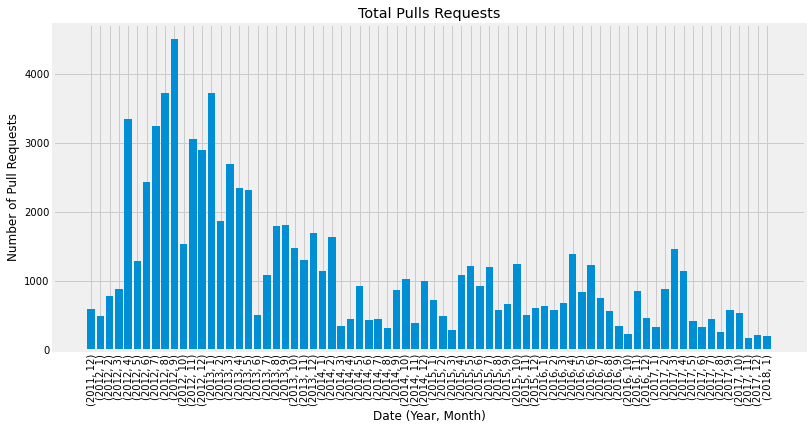

In [14]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, counts.values)
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel("Date (Year, Month)")
ax.set_ylabel("Number of Pull Requests")
ax.set_title("Total Pulls Requests");

## Is there camaraderie in the project?

In [15]:
# Group by the submitter
by_user = data.groupby(by=["user"])["pid"].count()

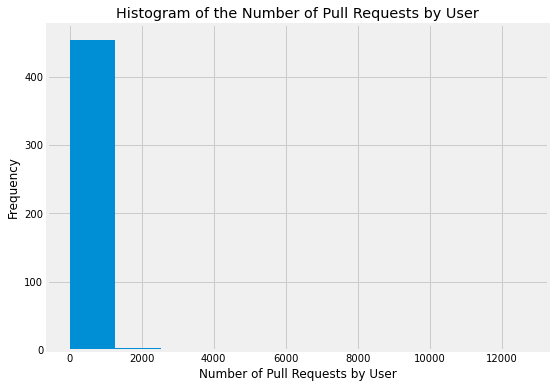

In [16]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(by_user.values)
ax.set_xlabel("Number of Pull Requests by User")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of the Number of Pull Requests by User");

## What files were changed in the last ten pull requests?

In [17]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10, "date")

In [18]:
# Join the two data sets
joined_pr = last_10.merge(right=pull_files, on="pid")

In [19]:
# Identify the unique files
files = joined_pr.file.unique

In [20]:
# Print the results
files

<bound method Series.unique of 0                       test/files/pos/t5638/Among.java
1                      test/files/pos/t5638/Usage.scala
2                            test/files/pos/t9291.scala
3                            test/files/run/t8348.check
4                 test/files/run/t8348/TableColumn.java
5             test/files/run/t8348/TableColumnImpl.java
6                       test/files/run/t8348/Test.scala
7               src/library/scala/concurrent/Lock.scala
8     src/compiler/scala/tools/nsc/profile/AsyncHelp...
9     src/compiler/scala/tools/nsc/profile/Profiler....
10    src/compiler/scala/tools/nsc/backend/jvm/BCode...
11    src/compiler/scala/tools/nsc/symtab/classfile/...
12    src/reflect/scala/reflect/internal/pickling/By...
13    src/compiler/scala/reflect/reify/phases/Calcul...
14                       src/library/scala/Predef.scala
15                  test/files/neg/leibniz-liskov.check
16                  test/files/neg/leibniz-liskov.scala
17               

## Who made the most pull requests to a given file?

In [21]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [22]:
# Identify the commits that changed the file
file_pr = data[data["file"] == file]

In [23]:
# Count the number of changes made by each developer
author_counts = file_pr.groupby(by=["user"])["pid"].count()

In [24]:
# Print the top 3 developers
print(author_counts.nlargest(3))

user
xeno-by     11
retronym     5
soc          4
Name: pid, dtype: int64


## Who made the last pull requests on a given file?

In [25]:
# Select the pull requests that changed the target file
file_pr = pull_files[pull_files["file"] == file]

In [26]:
# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(right=pulls, on="pid")

In [27]:
# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(n=10, columns="date")["user"])

In [28]:
# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## The pull requests of two special developers

In [29]:
# The developers we are interested in
authors = ['xeno-by', 'retronym']

In [30]:
# Get all the developers' pull requests
by_author = pulls[pulls.user.isin(authors)]

In [31]:
# Count the number of pull requests submitted each year
counts = by_author.groupby(by=["user", by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()

In [32]:
# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

/var/folders/6y/8tyffygj5nd1h5xxqrc4f7tc0000gp/T/ipykernel_83944/3038984226.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(ind) for ind in list(df.index)], rotation=90)


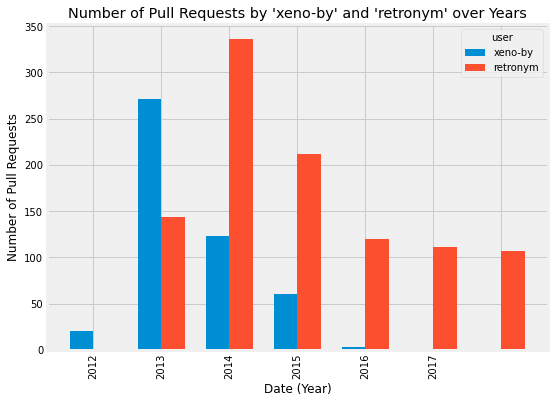

In [33]:
# Plot the results
plot_pull_requests(counts_wide, authors)

## Visualizing the contribution of each developer

In [34]:
# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data.user.isin(authors)]

In [35]:
# Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

In [36]:
# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

In [37]:
# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

/var/folders/6y/8tyffygj5nd1h5xxqrc4f7tc0000gp/T/ipykernel_83944/3038984226.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(ind) for ind in list(df.index)], rotation=90)


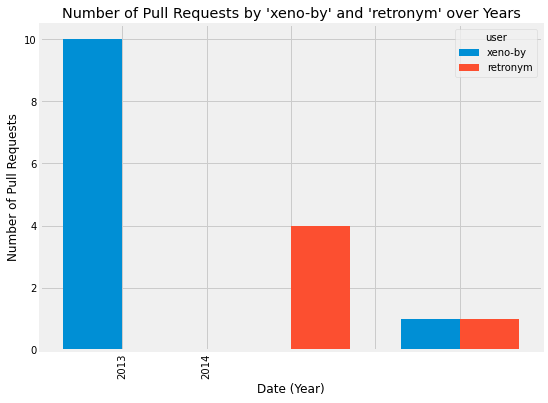

In [38]:
# Plot the results
plot_pull_requests(by_file_wide, authors)